<a href="https://colab.research.google.com/github/JakeOh/202110_itw_lab_python/blob/main/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning(기계 학습)

* __지도 학습(supervised learning)__: 레이블이 있는 데이터로 모델을 훈련시키는 것.
    * __분류(classification)__: 클래스를 분류.
    * __회귀(regression)__: 숫자 값을 예측.
* __비지도 학습(unsupervised learning)__: 레이블이 없는 데이터로 모델을 훈련시키는 것.
* __강화 학습(reinforcement learning)__: 보상과 벌칙을 통해서 학습(훈련).

# 문제 정의 

fish 데이터 셋에서 농어(Perch)의 무게(Weight)를 예측.
* 농어의 길이(Length)로만 무게(Weight)를 예측.
* 농어의 여러가지 특성들(Length, Diagonal, ...)로 무게(Weight)를 예측

# imports

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # KNN 알고리즘을 사용한 예측기
from sklearn.linear_model import LinearRegression  # 선형회귀 알고리즘을 사용한 예측기
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # 회귀 문제에서의 평가 지표
from sklearn.preprocessing import PolynomialFeatures, StandardScaler    # 전처리 변환기 클래스
from sklearn.pipeline import Pipeline       # 변환기와 추정기(예측기)를 연결해 주는 클래스

# 데이터 준비

In [301]:
fish_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [302]:
fish = pd.read_csv(fish_csv)

In [303]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [304]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [305]:
fish[fish["Species"]=="Perch"]

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415
77,Perch,100.0,18.0,19.2,5.2224,3.3216
78,Perch,78.0,18.7,19.4,5.1992,3.1234
79,Perch,80.0,19.0,20.2,5.6358,3.0502
80,Perch,85.0,19.6,20.8,5.1376,3.0368
81,Perch,85.0,20.0,21.0,5.0820,2.7720


In [306]:
# fish 데이터프레임에서 Perch(농어)만 선택
perch = fish[fish['Species'] == 'Perch']

In [307]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [308]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


농어(perch)의 길이(Length)를 알면 무게(Weight)를 예측할 수 있을까?

* 관심 변수, 종속 변수(label, target) - Weight --> 1차원 배열
* 독립 변수, 특성(features) - Length --> (컬럼이 1개인) 2차원 배열

In [309]:
X = perch[['Length']].values  # (컬럼이 1개인) 2차원 배열로 만들기 위해서
X[:5, :]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [310]:
y = perch['Weight'].values  # 1차원 배열
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련/테스트 셋 분리

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [312]:
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [313]:
y_train.shape, y_test.shape

((42,), (14,))

훈련 셋/테스트 셋 시각화(Weight ~ Length 산점도)

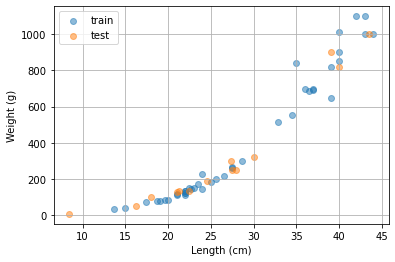

In [314]:
plt.scatter(X_train, y_train, label='train', alpha=0.5)
plt.scatter(X_test, y_test, label='test', alpha=0.5)

plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# KNN Regressor 모델 훈련, 평가

KNN Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측.

In [315]:
knn_reg = KNeighborsRegressor()  # k=5 인 모델 생성

In [316]:
knn_reg.fit(X_train, y_train)  # 모델 학습

KNeighborsRegressor()

In [317]:
# 학습된 훈련 셋의 예측값
train_pred = knn_reg.predict(X_train)
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [318]:
# 훈련 셋의 실젯값(레이블)
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

## 회귀 문제에서의 평가 지표:

* 기호 정의
    * $y_i$: $i$번째 샘플의 실젯값(label)
    * $\hat{y_i}$: $i$번째 샘플의 예측값
    * $\bar{y}$: 타겟의 평균값
    * $n$: 샘플 개수

* MSE(Mean Squared Errors): 오차들의 제곱의 평균
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

* RMSE(Root Mean Squared Errors): MSE의 제곱근
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
$$

* MAE(Mean Absolute Errors): 오차들의 절대값의 평균
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* $R^2$ score(결정 계수, coefficient of determinant)
$$
R^2 = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$

    * 일반적인 평가 지표는 점수가 높을 수록 좋은 모델, 점수가 낮을 수록 나쁜 모델.
    * 그런데, 회귀 문제에서는 오차(MSE, MAE)는 작을 수록 좋은 모델이고, 오차가 클 수록 나쁜 모델.
    * 회귀 문제에서도 점수가 높을 수록 좋은 모델이고 점수가 낮을 수록 나쁜 모델이라고 평가할 수 있는 지표가 필요. --> $R^2$ score(결정 계수)
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측한다면 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값이 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측한다면(즉, 오차가 매우 작다면) 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면 분자 = 분모 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하는 모델이라면(오차가 매우 크다면), 분자 > 분모 일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.
    * 즉, 결정 계수는 1에 가까울 수록 오차가 작은 좋은 예측 모델이고, 숫자가 작아질 수록 오차가 큰 나쁜 예측 모델임.

In [319]:
# 훈련 셋의 MSE, RMSE
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_rmse

60.96323638453089

In [320]:
# 훈련 셋의 MAE
mean_absolute_error(y_train, train_pred)

35.76190476190476

In [321]:
# 테스트 셋의 예측값
test_pred = knn_reg.predict(X_test)
print(test_pred)
print(y_test)  # 테스트 셋 실젯값

# 테스트 셋의 RMSE
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]
26.865192562655704


In [322]:
# 훈련 셋의 R^2(결정 계수)
train_r2 = r2_score(y_train, train_pred)
print('훈련 셋 R2:', train_r2)

# 테스트 셋의 R^2
test_r2 = r2_score(y_test, test_pred)
print('테스트 셋 R2:', test_r2)

훈련 셋 R2: 0.9698823289099254
테스트 셋 R2: 0.992809406101064


In [323]:
knn_reg.score(X_test, y_test)

0.992809406101064

# 모델 튜닝

k값 변화에 따른 훈련 셋과 테스트 셋에서의 $R^2$ score 변화 시각화

In [324]:
k_values= np.arange(1, 16)
train_scores= [] # 훈련 셋의 R^2 score를 저장할 리스트
test_scores=[] # 테스트 셋의 R^2 score를 저장할 리스트

for k in k_values:
    knn=KNeighborsRegressor(n_neighbors=k)   # KNN 예측기 모델 생성
    knn.fit(X_train, y_train)                       # 모델 훈련
    train_r2=knn.score(X_train, y_train)
    train_scores.append(train_r2)
    test_r2=knn.score(X_test, y_test)
    test_scores.append(test_r2)
    

print(train_scores)
print(test_scores)
    
    

[0.9852830341215901, 0.9828437127041165, 0.9804899950518966, 0.978211389719245, 0.9698823289099254, 0.9757140960298665, 0.9761170732051527, 0.9697604397763201, 0.9693310367551284, 0.96164569026043, 0.9515761381539326, 0.9467103631225754, 0.9413423450130075, 0.9429470576557883, 0.930201118360776]
[0.991309195814175, 0.9725010241788556, 0.9746459963987609, 0.9840231023848637, 0.992809406101064, 0.9855001139899048, 0.9781383949643516, 0.9780541148735824, 0.9692647749722698, 0.9737908255822255, 0.970279643030474, 0.967703620310643, 0.9639044643206888, 0.9615046463124021, 0.9554827691127018]


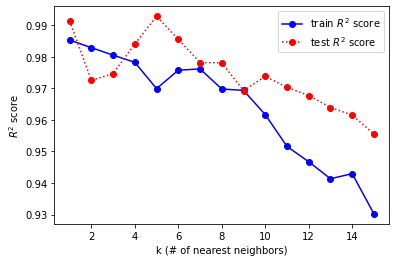

In [325]:
# 시각화
plt.plot(k_values,train_scores , "bo-", label="train $R^2$ score")
plt.plot(k_values, test_scores, 'ro:', label="test $R^2$ score")
plt.legend()
plt.xlabel("k (# of nearest neighbors)")
plt.ylabel("$R^2$ score")
plt.show()

# KNN Regressor 의 문제점

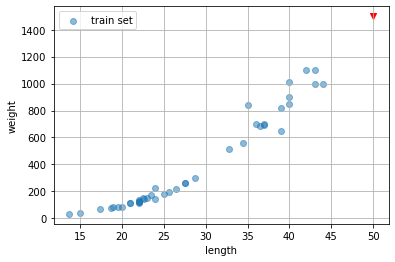

In [326]:
# 훈련 셋 시각화
plt.scatter(X_train, y_train, label="train set", alpha=0.5)

# 길이 50cm 무게 1500g인 가상의 농어 (Perch) 한 마리
test_fish_length=[[50]] # 특성 배열: (n_sample, n_feature) shape의 2차원 배열
test_fish_weight=[1500] # 레이블 배열: (n_sample) shape의 1차원 배열
plt.scatter(test_fish_length, test_fish_weight, marker='v', color="red" )


plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.grid()
plt.show()

In [327]:
knn=KNeighborsRegressor(n_neighbors=3)  # k=3 인 KNN regressor 생성
knn.fit(X_train, y_train)               # 모델 생성
prediction= knn.predict(test_fish_length)   # 길이 50cm인 가상의 농어의 무게 예측값
print(prediction)




[1033.33333333]


* 머신 러닝 알고리즘
    * 사례 기반 학습(instanc-based learning) KNN
        * 샘플들의 다수결 또는 평균으로 예측하는 알고리즘.
        * 특별한 수학적인 모델링이 사용되지 않는 알고리즘.
        * 장점: 이해하기 쉽다.
        * 단점: 이상치(outlier)에 대한 예측값은 매우 나쁘다.
    * 모델 기반 학습(model-based learning)   Linear Regression
        * 훈련 셋에서 수학적인 모델을 추론(공식)해서 예측하는 알고리즘

# 선형 회귀(Linear Regression)

In [328]:
lin_reg= LinearRegression()  # 선형 회귀 모델 생성


In [329]:
lin_reg.fit(X_train,y_train) # 모델 훈련

LinearRegression()

선형 회귀 모델을 훈련 셋으로 학습시킨다라는 의미는 데이터들을 가장 잘 <br>
설명할 수 있는(훈련 셋과 예측값들 사이의 오차가 적어지도록 하는) 직선(곡선)의 방정식을 찾는 과정.

$$
\hat{y_i} =w_0 +w_1 \times x_i
$$


* $w_0$ : 절편(intercept), 편향(bias)
* $w_1$ : 계수(coefiicient), 기울기(slope)
* 선형 회귀의 목적은 MSE(오차들의 제곱의 평균)이 가장 작아지는 절편($w_0$)과 계수($w_1$)들을 찾는 것.

In [330]:
lin_reg.intercept_ # 선형 회귀 모델을 훈련시킨 후 찾은 직선의 y 절편

-709.0186449535477

In [331]:
lin_reg.coef_ # 선형 회귀 모델을 훈련시킨 후 찾은 직선의 기울기(계수)

array([39.01714496])

선형 회귀 모델을 훈련시킨 후 찾은 수학적 모델(직선의 방정식)

$$
\hat{y}= -709 + 39 \times x
$$

In [332]:
-709+39*50

1241

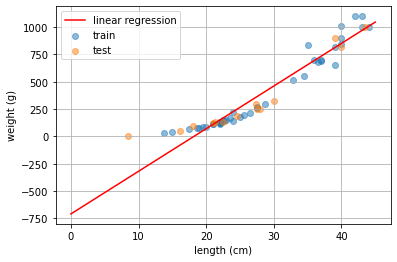

In [333]:
# 훈련/테스트 셋 선형 회귀 모델(직선) 시각화
plt.scatter(X_train, y_train, alpha=0.5, label="train")
plt.scatter(X_test,y_test,alpha=0.5, label="test")

# 직선(곡선) 시각화
x=np.arange(0,45,0.001)
w0= lin_reg.intercept_   # 직선의 y 절편
w1=lin_reg.coef_[0] # 직선의 기울기
y=w0+w1*x

plt.plot(x,y, "r-", label="linear regression")
plt.grid()
plt.legend()
plt.xlabel("length (cm)")
plt.ylabel("weight (g)")
plt.show()

In [334]:
# 훈련 셋에서의 예측값
train_pred= lin_reg.predict(X_train)
train_pred

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [335]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [336]:
# 훈련 셋에서의 R^2 score
lin_reg.score(X_train ,y_train)

0.939846333997604

In [337]:
# 테스트 셋에서의 R^2 score
lin_reg.score(X_test, y_test)

0.8247503123313558

# 2차 항(polymonial)을 포함하는 선형 회귀

$$
\hat{y}= w_0 + w_1 \times x + w_2 \times x^2
$$

2차 함수에 의해서 계산된 MSE가 최소가 되는 절편과 계수들을 찾는 것.

In [338]:
X_train.shape # 훈련 셋의 shape

(42, 1)

In [339]:
X_train[:3, :]

array([[19.6],
       [22. ],
       [18.7]])

In [340]:
# 특성(feature) 배열에 2차항을 추가
X_train_poly = np.c_[X_train,X_train**2]
X_train_poly.shape

(42, 2)

In [341]:
X_train_poly[:3 , :]

array([[ 19.6 , 384.16],
       [ 22.  , 484.  ],
       [ 18.7 , 349.69]])

In [342]:
# 테스트 셋의 특성 배열에 2차항을 추가
X_test_poly=np.c_[X_test, X_test**2]

In [343]:
X_test_poly.shape

(14, 2)

In [344]:
X_test_poly[:3,:]

array([[  8.4 ,  70.56],
       [ 18.  , 324.  ],
       [ 27.5 , 756.25]])

In [345]:
lin_reg2=LinearRegression() # 선형 회귀 모델 생성

In [346]:
lin_reg2.fit(X_train_poly,y_train)  # 선형 회귀 모델 훈련

LinearRegression()

In [347]:
# 학습 결과 - 선형 회귀식에서 절편(intercept)과 계수들(coefficients)를 찾음.
print(lin_reg2.intercept_)
print(lin_reg2.coef_)

116.05021078278372
[-21.55792498   1.01433211]


$$
\hat{y} = 116 - 21.6 \times x + 1.0 \times x^2
$$

In [348]:
116 -21.6 * 50 + 1.0 *(50 **2)

1536.0

In [349]:
# 훈련 셋의 예측값
train_pred= lin_reg2.predict(X_train_poly)
train_pred

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [350]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [351]:
# 테스트 셋 예측값
test_pred = lin_reg2.predict(X_test_poly)
test_pred

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

In [352]:
# 테스트 셋 실젯값
print(y_test)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [353]:
# 훈련 셋 R^2 score
lin_reg2.score(X_train_poly, y_train)

0.9706807451768623

In [354]:
# 테스트 셋 R^2 score
lin_reg2.score(X_test_poly, y_test)

0.9775935108325123

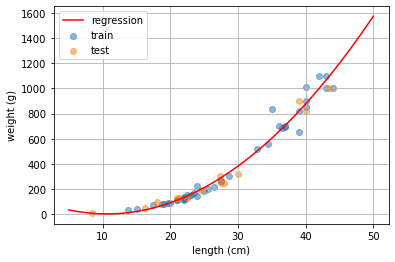

In [355]:
# 훈련/ 테스트 셋, (다항) 선형 회귀 모델 시각화
plt.scatter(X_train, y_train, alpha=0.5, label="train")
plt.scatter(X_test, y_test, alpha=0.5, label="test")

# 다항 선형 회귀 곡선 시각화
x=np.arange(5, 50, 0.001)
w0=lin_reg2.intercept_  # 2차 함수의 y절편
w1,w2=lin_reg2.coef_    # 2차 함수의 1차항과 2차항의 계수들
y= w0+ w1 * x +w2 * (x**2)

plt.plot(x,y, "r-", label="regression" )


plt.grid()
plt.legend()
plt.xlabel("length (cm)")
plt.ylabel("weight (g)")
plt.show()


# 행렬의 점곱(dot product), 내적(iner product)

(n, k) @ (k, m) = (n, m)

In [356]:
A =np.arange(1,7).reshape((3,2))
print(A) # (3,2)

[[1 2]
 [3 4]
 [5 6]]


In [357]:
B= np.array([[0,1,2],
             [1,2,3]])
print(B)

[[0 1 2]
 [1 2 3]]


In [358]:
# A@B
# A.dot(B)
np.dot(A,B)

array([[ 2,  5,  8],
       [ 4, 11, 18],
       [ 6, 17, 28]])

In [359]:
B@A

array([[13, 16],
       [22, 28]])

In [360]:
A= np.arange(6).reshape((3,2))
print(A)

[[0 1]
 [2 3]
 [4 5]]


In [361]:
w=np.array([1,2])
print(w)

[1 2]


In [362]:
A@w

array([ 2,  8, 14])

In [363]:
X_test_poly.shape, lin_reg2.coef_.shape

((14, 2), (2,))

In [364]:
lin_reg2.intercept_ + X_test_poly @ lin_reg2.coef_  # w0+X*w1

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

# PolynomialFeatures 변환기

scikit-learn 클래스

* Estimator(추정기, 예측기) 클래스
    * 머신 러닝 알고리즘을 구현한 클래스
    * `fit, predict, score` 메서드를 가지고 있음.
    * `KNeighborsClassfier, KNeighborRegressor, LinearRegression`, ...

* Transformer(변환기) 클래스
    * 전처리(preprocessing) 과정에서(모델을 훈련시키기 전에) 훈련 셋과 테스트 셋의 데이터들을 변환할 때 사용하는 클래스.
    * 